# <center><font color='green'> PUBG 

<center><img src='https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcjA4MDM4amhicGo2NnVoNW1vZWRoNW9tdGo1cnB4djh6ZmxxNHIwcSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/VwGyNp25HzBgFFmviV/giphy.webp'>

### Table Contents
1. .[Imporing Libraries](#import)
2. .[Reading](#read)
3. .[Data Wrangling](#clean)
4. .[Feature Engineering](#feature)
5. .[ML Catboost Model](#catboost)

# Importing Libraries<a class='anchor' id='import'>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv


# Reading<a class='anchor' id='read'>

In [2]:
df=pd.read_csv('/kaggle/input/pubg-games-dataset/PUBG_Game_Prediction_data.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.shape

(4446966, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Wrangling <a class='anchor' id='clean'>

In [5]:
df['winPlacePerc'].isnull().sum()

1

In [6]:
df = df.dropna(subset=['winPlacePerc'])

#### Understanding Players distribution in a game

In [7]:
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

In [8]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


<Axes: xlabel='playersJoined', ylabel='count'>

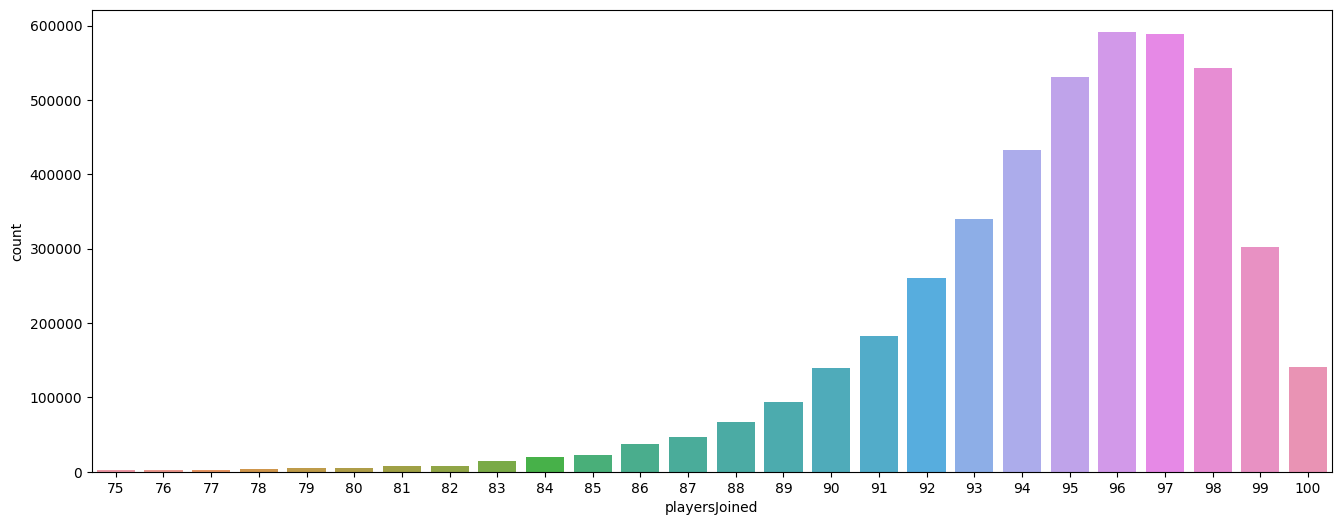

In [9]:
sns.countplot(data=df[df['playersJoined']>=75],x='playersJoined')

#### Kills without moving

In [10]:
df['totalDistance']=df['walkDistance']+df['rideDistance']+df['swimDistance']
df['killsWithoutMoving']=((df['kills']>0) & (df['totalDistance']==0))
df[df['killsWithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [11]:
df=df.drop(df[df['killsWithoutMoving']==True].index)

#### Extraordinary road kills

In [12]:
df[df['roadKills']>5].shape

(46, 32)

In [13]:
df=df.drop(df[df['roadKills']>5].index)

#### So many kills..?

<Axes: xlabel='kills', ylabel='count'>

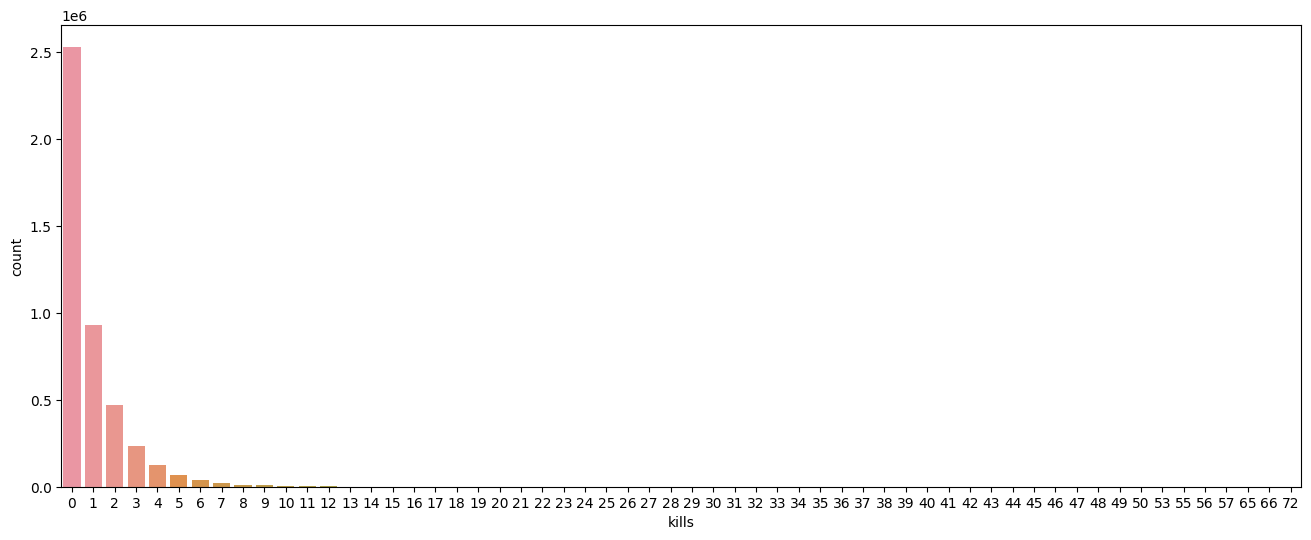

In [14]:
sns.countplot(data=df,x='kills')

<Axes: xlabel='kills', ylabel='count'>

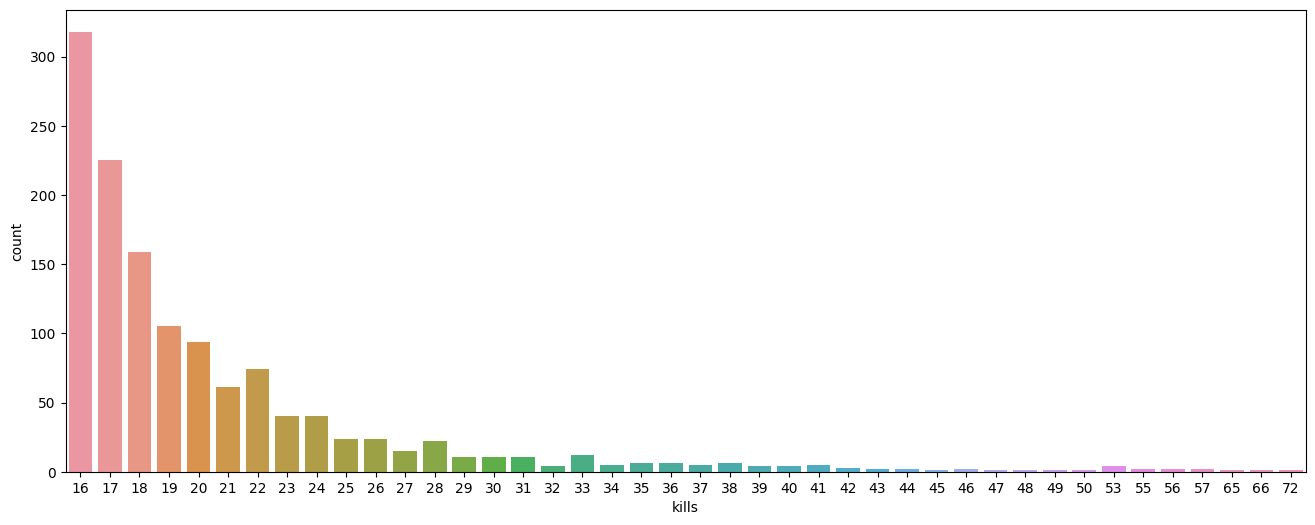

In [15]:
sns.countplot(data=df[df['kills']>15],x='kills')

In [16]:
df=df.drop(df[df['kills']>20].index)

#### Head shots

<Axes: xlabel='headshotRate', ylabel='Density'>

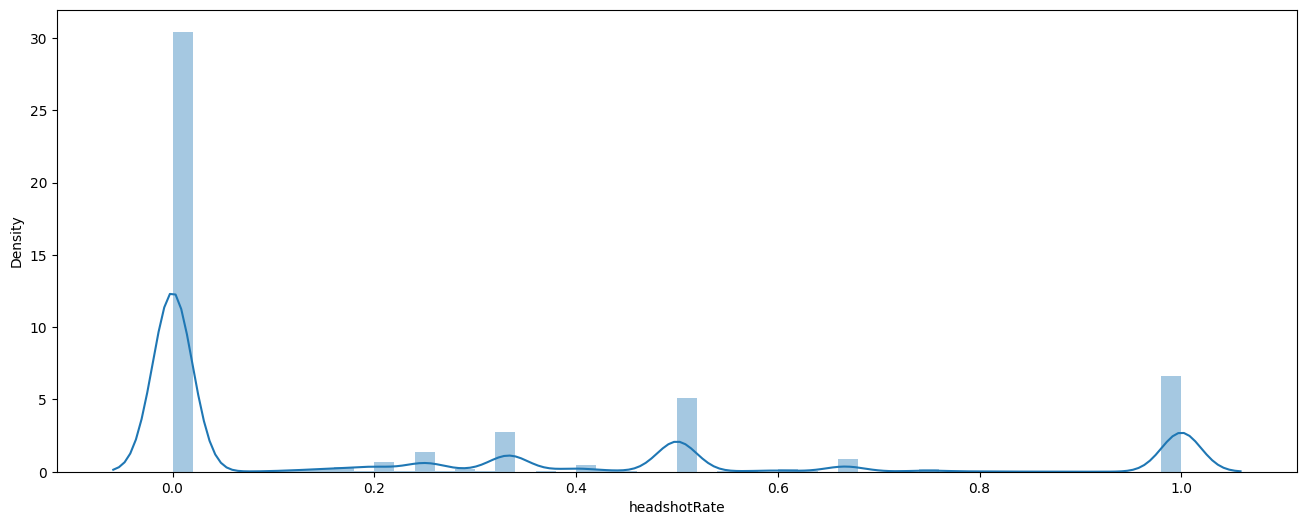

In [17]:
df['headshotRate']=df['headshotKills']/df['kills']
sns.distplot(df['headshotRate'])

In [18]:
df=df.drop(df[(df['headshotRate']==1) & (df['kills']>6)].index)

#### Longest Kill

<Axes: xlabel='longestKill', ylabel='Density'>

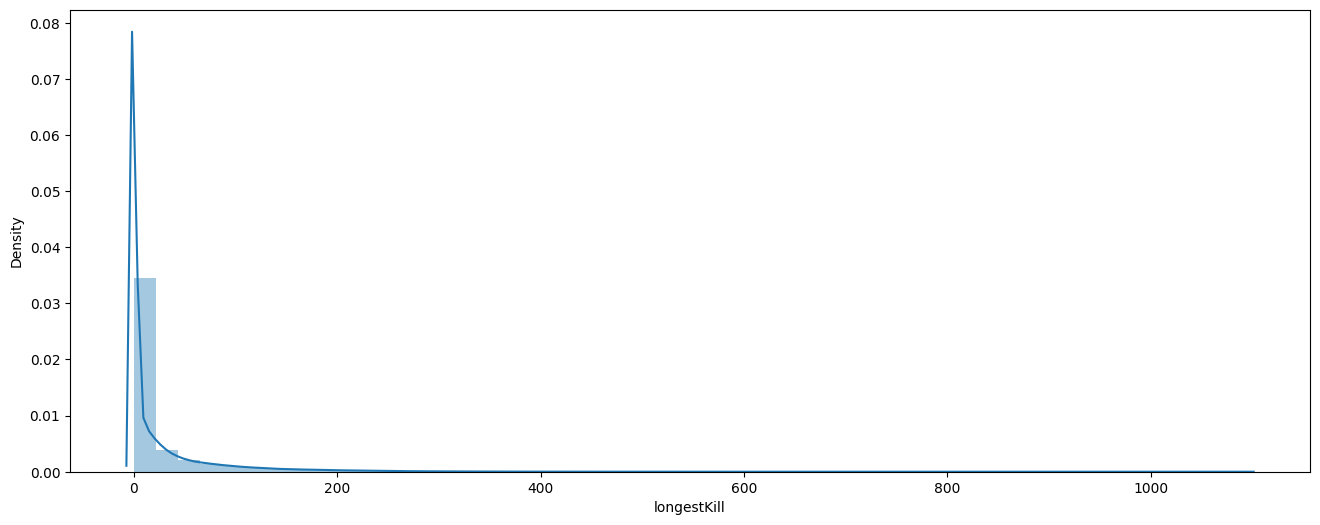

In [19]:
sns.distplot(df['longestKill'])

In [20]:
df=df.drop(df[df['longestKill']>500].index)

#### Weapons Change

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

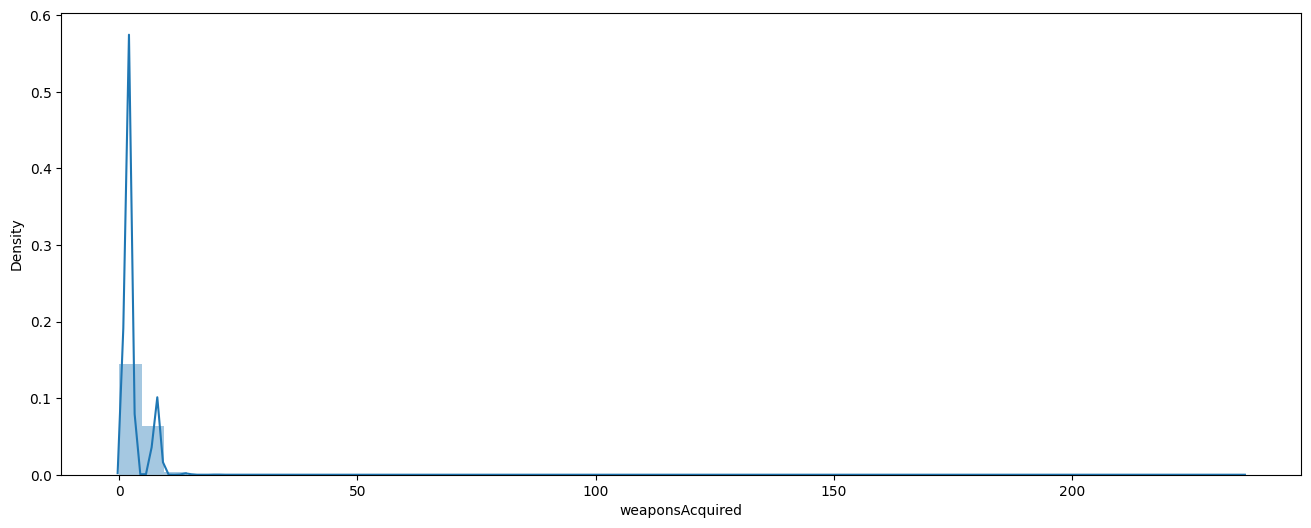

In [22]:
sns.distplot(df['weaponsAcquired'])

In [24]:
df=df.drop(df[df['weaponsAcquired']>15].index)

#### EDA

<Axes: >

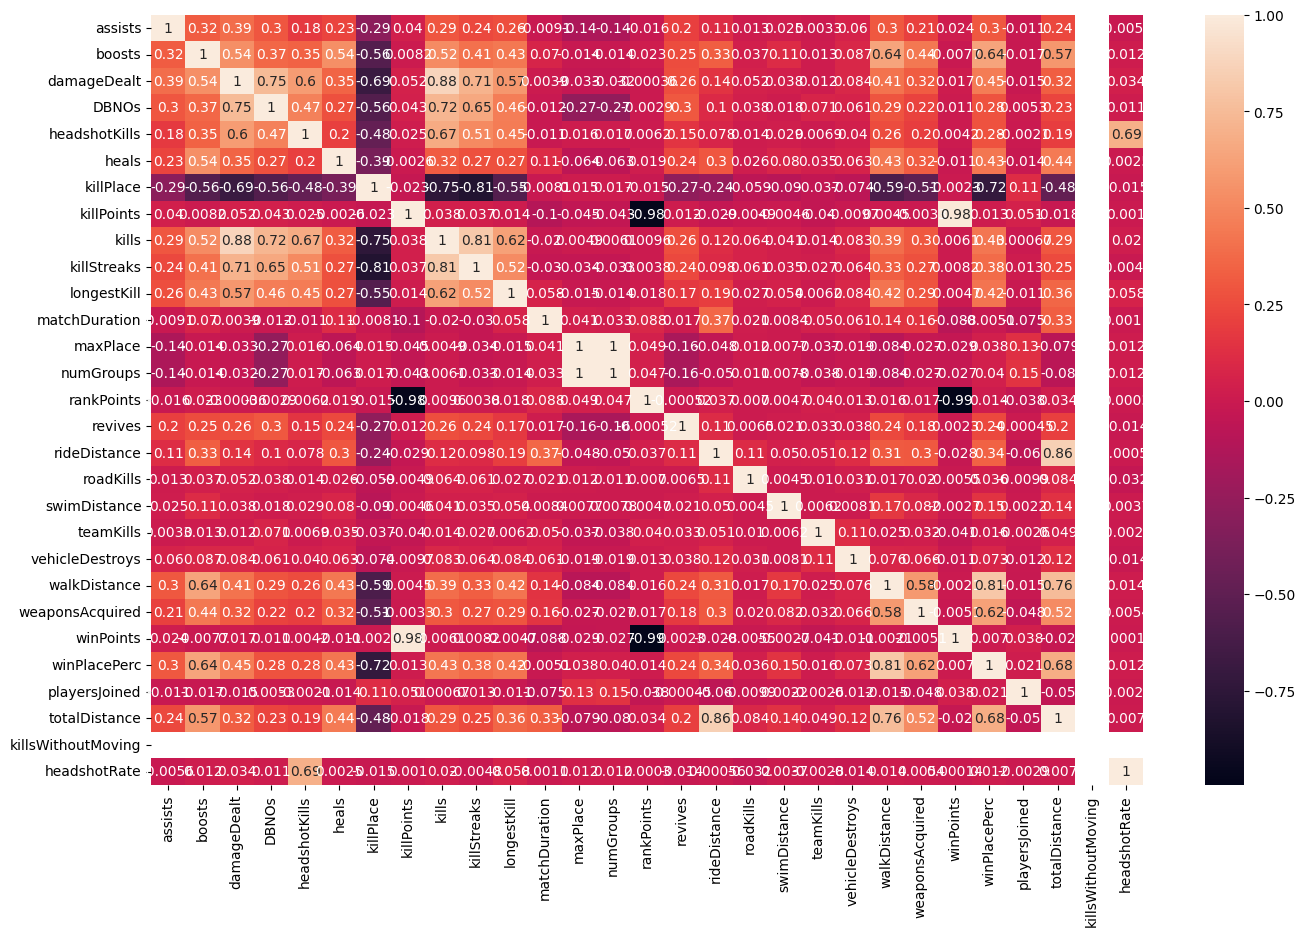

In [29]:
plt.rcParams['figure.figsize']=(16,10)
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Feaure Engineering <a class='anchor' id='feature'>

In [31]:
normalising_factor=(100-df['playersJoined']/100)+1
df['killNorm']=df['kills']*normalising_factor
df['damageDealtNorm']=df['damageDealt']*normalising_factor
df['maxPlaceNorm']=df['maxPlace']*normalising_factor
df['matchDurationNorm']=df['matchDuration']*normalising_factor

In [32]:
df['healsBoosts']=df['heals']+df['boosts']
df['assist']=df['assists']+df['revives']

In [33]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killsWithoutMoving', 'headshotRate', 'killNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm', 'healsBoosts',
       'assist'],
      dtype='object')

In [34]:
df=df.drop(columns=['heals','assists','boosts','revives','Id','groupId','matchId','damageDealt','maxPlace','matchDuration','kills','walkDistance','rideDistance','swimDistance'])
df.head()           

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playersJoined,totalDistance,killsWithoutMoving,headshotRate,killNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsBoosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,False,NaN,0.00,0.0000,2801.12,130652.24,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,False,NaN,0.00,9155.2323,2602.34,177859.93,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,False,NaN,0.00,6801.3600,5001.00,131826.36,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,False,NaN,0.00,3292.9610,3102.79,143729.24,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,0,0


# ML-Catboost Model <a class='anchor' id='catboost'>

#### Handling categorical data

In [47]:
x=df.drop(['winPlacePerc'],axis=1)
y=df['winPlacePerc']
features=x.columns

In [48]:
x.shape

(4437682, 24)

In [51]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [50]:
x=pd.get_dummies(x,columns=['matchType','killsWithoutMoving'])

#### Scaling the data

In [54]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [55]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,-0.582712,-0.383999,0.449564,1.172537,-0.765156,-0.459684,-0.732763,-1.212394,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,1.236300,0.0
1,-0.582712,-0.383999,0.340274,-0.804724,-0.765156,-0.459684,-0.775734,0.803562,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,1.236300,0.0
2,-0.582712,-0.383999,-0.024027,-0.804724,-0.765156,-0.459684,0.169630,0.813065,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,-0.808865,0.0
3,-0.582712,-0.383999,0.996015,-0.804724,-0.765156,-0.459684,-0.560878,0.700389,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,-0.370783,-0.405077,1.236300,0.0
4,-0.582712,-0.383999,-0.096888,-0.804724,0.647425,0.727044,2.232242,0.906736,-0.049576,-0.142531,...,-0.033643,-0.005516,-0.013898,-0.008425,-0.054801,-0.206548,2.696994,-0.405077,-0.808865,0.0


#### Spliting the data

In [58]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3,random_state=3)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((3106377, 39), (1331305, 39), (3106377,), (1331305,))

### CatBoost Model

In [60]:
train_dataset=cb.Pool(xtrain,ytrain)
test_dataset=cb.Pool(xtest,ytest)

In [61]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [63]:
grid={'iterations':[100,150],
     'learning_rate':[0.03,0.1],
     'depth':[2,4,6,8]}
model.grid_search(grid,train_dataset)

0:	learn: 0.5482978	test: 0.5481321	best: 0.5481321 (0)	total: 218ms	remaining: 21.6s
1:	learn: 0.5334513	test: 0.5332901	best: 0.5332901 (1)	total: 406ms	remaining: 19.9s
2:	learn: 0.5190762	test: 0.5189205	best: 0.5189205 (2)	total: 574ms	remaining: 18.6s
3:	learn: 0.5051377	test: 0.5049822	best: 0.5049822 (3)	total: 746ms	remaining: 17.9s
4:	learn: 0.4916821	test: 0.4915328	best: 0.4915328 (4)	total: 913ms	remaining: 17.3s
5:	learn: 0.4786635	test: 0.4785178	best: 0.4785178 (5)	total: 1.08s	remaining: 16.9s
6:	learn: 0.4660612	test: 0.4659190	best: 0.4659190 (6)	total: 1.25s	remaining: 16.6s
7:	learn: 0.4538420	test: 0.4537010	best: 0.4537010 (7)	total: 1.42s	remaining: 16.3s
8:	learn: 0.4420564	test: 0.4419202	best: 0.4419202 (8)	total: 1.59s	remaining: 16.1s
9:	learn: 0.4306639	test: 0.4305272	best: 0.4305272 (9)	total: 1.76s	remaining: 15.8s
10:	learn: 0.4196294	test: 0.4194930	best: 0.4194930 (10)	total: 1.93s	remaining: 15.6s
11:	learn: 0.4089676	test: 0.4088335	best: 0.4088335

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [75]:
feature_importance_df=pd.DataFrame()
feature_importance_df['features']=x.columns
feature_importance_df['importances']=model.feature_importances_
feature_importance_df=feature_importance_df.sort_values(by=['importances'],ascending=False)

In [76]:
feature_importance_df

,features,importances
2,killPlace,41.381024
14,totalDistance,24.326927
16,killNorm,7.800571
4,killStreaks,5.100853
19,matchDurationNorm,4.906868
13,playersJoined,4.462883
15,headshotRate,2.095144
6,numGroups,2.077183
5,longestKill,2.062010
20,healsBoosts,1.904497


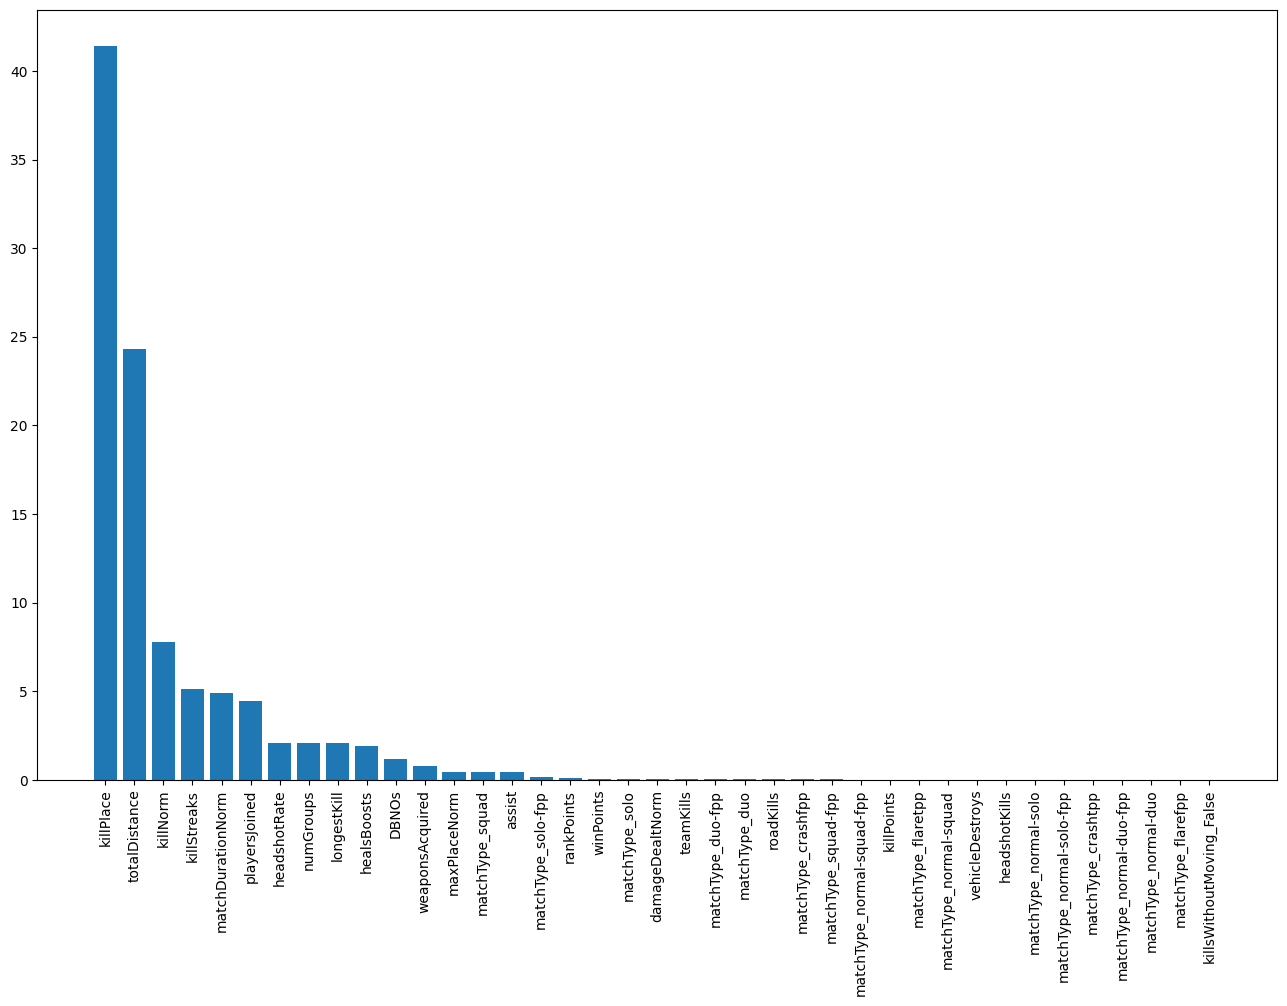

In [85]:
plt.bar(feature_importance_df['features'],feature_importance_df['importances'])
plt.xticks(rotation = 90)
plt.show()

#### Prediction

In [69]:
pred=model.predict(xtest)
rmse=np.sqrt(mean_squared_error(ytest,pred))
r2=r2_score(ytest,pred)
print('RMSE:',round(rmse,2),'\nR2:',round(r2,2))

RMSE: 0.08 
R2: 0.93


<center><img src='https://gifdb.com/images/high/winner-winner-chicken-dinner-498-x-278-gif-pup0zj398j7tryh6.webp'>